## MLP (Multi-Layer Perceptron) Classification

- Dataset: Iris data (총 150개의 붓꽃에 대한 수치적 정보)
- Feature dimension: 2차원 (sepal length, sepal width의 2개만 사용함)
- Number of classes: 3 {Iris-setosa, Iris-vericolor, Iris-virginica}
- Train : Test = 7:3 (= 105개:45개)
- Train = {Train : validation = 3:1 = 78개 : 27개}
- Training method: MLP: Dense(10, Relu)-Dense(10, Relu)-Dense(3, Softmax)


#### 데이터셋 준비

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris['data'], iris['target']
class_names = iris['target_names']
feature_names = iris['feature_names']

print("class names: ", class_names)
print("feature_names: ", feature_names)
print("iris.keys(): ", iris.keys())
print(type(X), X.shape)

class names:  ['setosa' 'versicolor' 'virginica']
feature_names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.keys():  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
<class 'numpy.ndarray'> (150, 4)


####  $\circ$ 매 10번째 sample {특징값(4D), 라벨}들을 출력함.

In [35]:
print("Samples per 10\nFeature, y:class_names[y]")
for c in range(0, 150, 10):
    print("{}, {}:{}".format(X[c], y[c], class_names[y[c]]))

Samples per 10
Feature, y:class_names[y]
[5.1 3.5 1.4 0.2], 0:setosa
[5.4 3.7 1.5 0.2], 0:setosa
[5.4 3.4 1.7 0.2], 0:setosa
[4.8 3.1 1.6 0.2], 0:setosa
[5.  3.5 1.3 0.3], 0:setosa
[7.  3.2 4.7 1.4], 1:versicolor
[5.  2.  3.5 1. ], 1:versicolor
[5.9 3.2 4.8 1.8], 1:versicolor
[5.5 2.4 3.8 1.1], 1:versicolor
[5.5 2.6 4.4 1.2], 1:versicolor
[6.3 3.3 6.  2.5], 2:virginica
[6.5 3.2 5.1 2. ], 2:virginica
[6.9 3.2 5.7 2.3], 2:virginica
[7.4 2.8 6.1 1.9], 2:virginica
[6.7 3.1 5.6 2.4], 2:virginica


### Data processing (1)
- 150개의 iris 데이터를 학습/테스트 데이터로 분리 및 shuffling
- shuffling random seed = 42, test_size = 0.3
- {학습용: 105개, 테스트용: 45개}

In [36]:
pa_test_split = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=pa_test_split)

print('Dataset size = ', len(X[:,0]))
print("Shapes of Train features = ", X_train.shape)
print("Shapes of Test feature = ", X_test.shape)
print('Feature dimension = ', len(X[0,:]))
print('Train:Test = {0}:{1}'.format(len(X_train)/len(X), len(X_test)/len(X)))

print("\nTraining samples per 10\nFeature, y:class_names[y]")
for c in range(0, 105, 10):
    print("{}, {}:{}".format(X_train[c], y_train[c], class_names[y_train[c]]))

Dataset size =  150
Shapes of Train features =  (105, 4)
Shapes of Test feature =  (45, 4)
Feature dimension =  4
Train:Test = 0.7:0.3

Training samples per 10
Feature, y:class_names[y]
[5.5 2.4 3.7 1. ], 1:versicolor
[5.8 2.7 4.1 1. ], 1:versicolor
[5.1 3.4 1.5 0.2], 0:setosa
[5.4 3.  4.5 1.5], 1:versicolor
[4.9 3.1 1.5 0.2], 0:setosa
[5.5 2.5 4.  1.3], 1:versicolor
[4.6 3.4 1.4 0.3], 0:setosa
[6.9 3.1 5.4 2.1], 2:virginica
[5.6 3.  4.1 1.3], 1:versicolor
[6.9 3.1 4.9 1.5], 1:versicolor
[6.1 2.8 4.  1.3], 1:versicolor


### Data processing (2)
- 모든 학습용 sample들의 feature값들에 대해 정규화
- (normalization: mean=0, stardard dev.=1)을 수행함.

$ x_i = [x_{i,1}, x_{i,2}, x_{i,3}, x_{i,4}]$   
where $i=1, ..., 105, \hat{x}_i$ is normalized version of the i-th sample $ x_i$, 

$m_i = \frac{1}{105}\sum_{n=1}^{105}x_{i,1}$, and

$\sigma_i =  \frac{1}{105} \sum_{n=1}^{105} (x_{i,1}-\bar{m_i})^2$ where $i=1, 2, 3, 4$

In [37]:
# X_train의 평균과 분산
X_train_mean_before_normal = [X_train[:,0].mean(), X_train[:,1].mean(), X_train[:,2].mean(), X_train[:,3].mean()]
X_train_std_before_normal = [X_train[:,0].std(), X_train[:,1].std(), X_train[:,2].std(), X_train[:,3].std()]

# X_train의 정규화
X_train = (X_train - X_train_mean_before_normal) / X_train_std_before_normal

X_train_mean = [X_train[:,0].mean(), X_train[:,1].mean(), X_train[:,2].mean(), X_train[:,3].mean()]
X_train_std = [X_train[:,0].std(), X_train[:,1].std(), X_train[:,2].std(), X_train[:,3].std()]
print("Mean = ", X_train_mean)
print("Std = ", X_train_std)

print("\nNormalized training samples per 10\nFeature, y:class_names[y]")
for c in range(0, 105, 10):
    print("{}, {}:{}".format(X_train[c], y_train[c], class_names[y_train[c]]))

Mean =  [3.6795963101862333e-16, 9.198990775465583e-17, 5.2867763077388404e-17, 1.0996494720096789e-16]
Std =  [1.0, 1.0, 0.9999999999999999, 1.0]

Normalized training samples per 10
Feature, y:class_names[y]
[-0.4134164  -1.46200287 -0.09951105 -0.32339776], 1:versicolor
[-0.05167705 -0.74242333  0.13397857 -0.32339776], 1:versicolor
[-0.89573553  0.93659559 -1.38370397 -1.40568508], 0:setosa
[-0.53399618 -0.02284379  0.36746819  0.35303182], 1:versicolor
[-1.1368951   0.21701605 -1.38370397 -1.40568508], 0:setosa
[-0.4134164  -1.22214302  0.07560616  0.08245999], 1:versicolor
[-1.49863445  0.93659559 -1.44207638 -1.27039917], 0:setosa
[1.27470056 0.21701605 0.89281984 1.16474731], 2:virginica
[-0.29283662 -0.02284379  0.13397857  0.08245999], 1:versicolor
[1.27470056 0.21701605 0.60095781 0.35303182], 1:versicolor
[ 0.3100623  -0.50256349  0.07560616  0.08245999], 1:versicolor


### Step 1:</span> Build a model 
- Input nodes: 4 
- Dense (1st hidden) layer: 10 nodes,  활성함수: ReLU
- Dense (2nd hidden) layer: 10 nodes,  활성함수: ReLU
- Dense (output) layer: 3 nodes,  활성함수: softmax

- Training method: MLP: Dense(10, Relu)-Dense(10, Relu)-Dense(3, Softmax)

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(4,)))

# Dense(10, 'relu') - Dense(10, 'relu') - Dense(3, 'softmax) layer
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))
         
model.summary()       

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


### <span style="color:red"> Step 2: </span> Set up training 

In [39]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### <span style="color:red"> Step 3: </span>Training model
- Train = {Train : validation = 3:1 = 78개 : 27개}
- i.e. validation_split = 0.25

In [40]:
# Hyperparameters
pa_epochs = 100
pa_batch_size = 8
pa_validation_slit = 0.25

history = model.fit(X_train, y_train, epochs = pa_epochs, batch_size =pa_batch_size, validation_split = pa_validation_slit, verbose = 2)                    

Epoch 1/100
10/10 - 1s - loss: 1.1802 - accuracy: 0.3205 - val_loss: 1.1140 - val_accuracy: 0.4444 - 525ms/epoch - 52ms/step
Epoch 2/100
10/10 - 0s - loss: 1.1131 - accuracy: 0.3333 - val_loss: 1.0564 - val_accuracy: 0.4815 - 54ms/epoch - 5ms/step
Epoch 3/100
10/10 - 0s - loss: 1.0618 - accuracy: 0.3462 - val_loss: 1.0116 - val_accuracy: 0.4815 - 41ms/epoch - 4ms/step
Epoch 4/100
10/10 - 0s - loss: 1.0214 - accuracy: 0.3462 - val_loss: 0.9721 - val_accuracy: 0.5185 - 55ms/epoch - 5ms/step
Epoch 5/100
10/10 - 0s - loss: 0.9845 - accuracy: 0.3846 - val_loss: 0.9351 - val_accuracy: 0.5556 - 60ms/epoch - 6ms/step
Epoch 6/100
10/10 - 0s - loss: 0.9503 - accuracy: 0.5641 - val_loss: 0.9012 - val_accuracy: 0.7407 - 57ms/epoch - 6ms/step
Epoch 7/100
10/10 - 0s - loss: 0.9194 - accuracy: 0.6795 - val_loss: 0.8691 - val_accuracy: 0.7778 - 57ms/epoch - 6ms/step
Epoch 8/100
10/10 - 0s - loss: 0.8898 - accuracy: 0.7179 - val_loss: 0.8377 - val_accuracy: 0.8148 - 57ms/epoch - 6ms/step
Epoch 9/100
10

In [41]:
print('history params = ', history.params)
print('history epoch = ', history.epoch)
print('history keys = ',history.history.keys())

history params =  {'verbose': 2, 'epochs': 100, 'steps': 10}
history epoch =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
history keys =  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


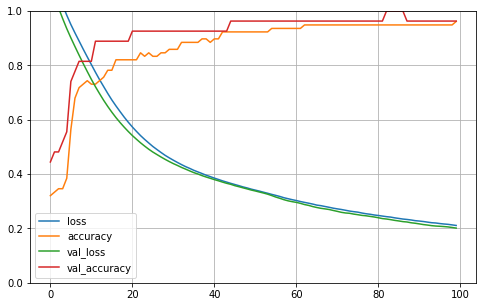

In [42]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Step 4: </span> Model Evaluation by using Test dataset
- 학습 dataset에 대해 정규화에 사용한 평균과 표준편차를 이용해서 
테스트 dataset에 대해서도 동일한 정규화를 수행   
※ 테스트 dataset에 대해 별도로 정규화를 하면 학습된 모델 파라미터는 다르게 동작 가능


In [43]:
# X_test를 훈련 데이터의 평균과 표준편차를 이용해 정규화
X_test = (X_test - X_train_mean_before_normal) / X_train_std_before_normal

model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1595 - accuracy: 1.0000


[0.15951751172542572, 1.0]

### <span style="color:red"> Step 5: </span> Prediction 
- Test dataset의 처음 3개의 sample들에 대해 예측 수행

In [55]:
X_new = X_test[:3]
y_new = y_test[:3]
print('정답값(GT):\n', y_new, np.array(class_names)[y_new], end='\n\n')

y_prob = model.predict(X_new)
print('예측 확률:\n', y_prob.round(2))

y_pred =  [np.argmax(y_prob[0,:]), np.argmax(y_prob[1,:]), np.argmax(y_prob[2,:])]
print('\n예측 결과:\n', y_pred, np.array(class_names)[y_pred])

정답값(GT):
 [1 0 2] ['versicolor' 'setosa' 'virginica']

1/1 [==============================] - 0s 17ms/step
예측 확률:
 [[0.05 0.75 0.2 ]
 [1.   0.   0.  ]
 [0.   0.01 0.99]]

예측 결과:
 [1, 0, 2] ['versicolor' 'setosa' 'virginica']
